# <h1><b><center>Webscraping Project - carpages.ca</center></b></h1>

<h3> <center>Sree & Richa</center> </h3> 

<h2>Contents</h2>

1.-Install and Import Libraries

2.-Data-Scraping

3.-Data-Cleanup

4.-Store the Cleaned Data

5.-Exploratory Data Analysis

# 1.-Install and Import Libraries

In [452]:
import requests
from bs4 import BeautifulSoup

In [453]:
import numpy as np
import pandas as pd
import random
from time import sleep
from tqdm import tqdm # to show a smart progress meter
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [142]:
#pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2.-Data-Scraping

In [ ]:
#2.1 Setting up Beautiful Soup 

In [146]:
#Access the home page of the website with get() request
page=requests.get('https://www.carpages.ca/used-cars/search/')
print("Status: ",page.status_code)
soup=BeautifulSoup(page.content, 'lxml')

Status:  200


In [147]:
# Create an empty dictionary with 6 columns to store data after every 20 pages
cars_dict={'url':[],
           'bodyType':[],
           'fuelType':[],
           'driveType':[],
           'name':[],
           'description':[],
           'location':[], 
           'traveled':[],
           'price':[],
           'color':[]
           
          }

In [ ]:
#2.2 Scraping data from each individual car

In [148]:
## Extracting detailed information on cars from each page
def individual_car_info(car_url):
    x = False #set the flags which will be used to handle missing values while scraping the data
    y = False
    z = False
    result = requests.get(car_url) 
    soup = BeautifulSoup(result.content)
    sleep(2)
    #Store the value of 'Body Style', when found  else store 'N/A'
    for body in soup.find_all('li', class_='box--light-grey round'):
        
        if body.find_all('span')[0].get_text(strip=True) == 'Body Style':
            style =body.find_all('span')[1].get_text(strip=True) 
            x = True                
        if not x:
            style = 'Unknown'

        if body.find_all('span')[0].get_text(strip=True) == 'Fuel Type':
            y = True
            fuel = body.find_all('span')[1].get_text(strip=True)               
        if not y:
            fuel = 'Unknown'
   
        if body.find_all('span')[0].get_text(strip=True) == 'Drive Type':
            z = True
            drive = body.find_all('span')[1].get_text(strip=True)              
        if not z:
            drive = 'Unknown'
            
    return  style,fuel,drive

In [ ]:
#2.3 Crawler to scrape the data from first 100 pages

In [149]:
for i in tqdm(range(1,101)): ## tqdm to show a smart progress meter 
    # send the http request to the server using get method and store the response in variable page
    page= requests.get(f'https://www.carpages.ca/used-cars/search/?num_results=50&p={i}') 

    # Convert the response content from bytes to string
    html_content = page.content.decode('utf-8')
    # Create a beautiful soup object, to interact with html code
    soup = BeautifulSoup(html_content, 'html.parser')


    car_blocks=soup.find_all('div', class_='media soft push-none rule') ## select whole block of car for each car(which is in div element)
    for car in car_blocks:# from each car block scrape the required data
        try:
            path=car.find('a', class_='media__img media__img--thumb').get('href')
            url='https://www.carpages.ca'+path
            ### Append to cars dictionary
            cars_dict['url'].append(url)
            bodyType,fuelType,driveType=(individual_car_info(url))
            cars_dict['bodyType'].append(bodyType)
            cars_dict['fuelType'].append(fuelType)
            cars_dict['driveType'].append(driveType)
        except:
            url=' '

        try:
            name=car.find('h4', class_='hN').get_text(strip=True)
            cars_dict['name'].append(name)
        except:
            name=' '
        try:
            description = car.find('hgroup', class_='push-half--bottom').h5.get_text(strip=True)
            cars_dict['description'].append(description)
        except:
            description = ' '
        try:
            location=car.find('hgroup', class_='vehicle__card--dealerInfo').get_text()
            cars_dict['location'].append(location)
        except:
            location=' '
        try:
            traveled = car.find('div', class_='grey l-column l-column--small-6 l-column--medium-4').get_text(strip=True)
            cars_dict['traveled'].append(traveled)
        except:
            traveled = ' '
        try:
            price=car.find('strong', class_='delta').get_text(strip=True)
            cars_dict['price'].append(price)
        except:
            price=' '
        try:        
            color=car.find_all('div', class_='grey l-column l-column--small-6 l-column--medium-4')[1].get_text(strip=True)
            cars_dict['color'].append(color)
        except: 
            color= ' '
    # create a dataframe for each page with 50 cars on each page
    cars_df = pd.DataFrame.from_dict(cars_dict,orient='index').transpose()
    cars_df.to_csv('car_listings.csv',mode = 'a',header=False)
    # Clear the dictionary and re initialize
    cars_dict.clear()
    cars_dict={ 'url':[],'bodyType':[],'fuelType':[],'driveType':[],'name':[],'description':[],'location':[],'traveled':[],
                    'price':[],'color':[]}
                
    sleep(random.randint(1,3))
    

100%|██████████| 101/101 [3:53:10<00:00, 138.52s/it] 


# 3.-Data-Cleanup

In [155]:
# Read data from car_listings.csv
cols=['url','bodyType','fuelType','driveType','name','features','location','mileage','price($)','color']
all_cars = pd.read_csv("car_listings.csv",index_col=0,names=cols)
print(all_cars.shape)
all_cars.head(10)

(4949, 10)


,url,bodyType,fuelType,driveType,name,features,location,mileage,price($),color
0,https://www.carpages.ca/used-cars/ontario/komo...,SUV / Crossover,Gasoline,All Wheel Drive,2012 BMW X1,28i,"\nCars in Lobo\nKomoka, ON\n","200,150KM","$9,995",Black
1,https://www.carpages.ca/used-cars/ontario/guel...,Coupe,Gasoline,Rear Wheel Drive,2013 Ford Mustang,GT Convertible/ CLEAN CARFAX/ MANUAL,"\nRoyal City Fine Cars\nGuelph, ON\n\n\n\n\n\n...","91,156KM","$31,995",Gotta Have it Green
2,https://www.carpages.ca/new-cars/manitoba/elie...,Pickup Truck,Flex Fuel,4-Wheel Drive,2023 Ford F-150,LARIAT 4WD SUPERCREW 6.5' BOX,"\nWilf's Elie Ford\nElie, MB\n",6KM,"$86,215",Carbonized Grey
3,https://www.carpages.ca/used-cars/ontario/osha...,Wagon,Gasoline,All Wheel Drive,2012 Subaru Impreza,Touring,"\nGarden Street Auto Sales Ltd.\nOshawa, ON\n","283,255KM","$7,999",Black
4,https://www.carpages.ca/new-cars/manitoba/elie...,Pickup Truck,Flex Fuel,4-Wheel Drive,2023 Ford F-150,LARIAT 4WD SUPERCREW 5.5' BOX,"\nWilf's Elie Ford\nElie, MB\n",5KM,"$88,415",Agate Black
5,https://www.carpages.ca/new-cars/manitoba/elie...,SUV / Crossover,Gasoline,4-Wheel Drive,2023 Ford Bronco Sport,Big Bend 4x4,"\nWilf's Elie Ford\nElie, MB\n",10KM,"$43,864",Eruption Green Metallic
6,https://www.carpages.ca/used-cars/ontario/alli...,Sedan,Gasoline,All Wheel Drive,2015 Subaru Legacy,2.5i w/Limited Pkg,"\nAlliston Auto Centre\nAlliston, ON\n","95,600KM","$19,500",Red
7,https://www.carpages.ca/new-cars/manitoba/elie...,Pickup Truck,Gasoline,4-Wheel Drive,2023 Ford F-150,XLT 4WD SUPERCREW 5.5' BOX,"\nWilf's Elie Ford\nElie, MB\n",5KM,"$73,870",Oxford White
8,https://www.carpages.ca/used-cars/ontario/alli...,Sedan,Gasoline,Front Wheel Drive,2014 Hyundai Sonata,GLS,"\nAlliston Auto Centre\nAlliston, ON\n","123,000KM","$12,900",Gray
9,https://www.carpages.ca/used-cars/ontario/alli...,Wagon,Gasoline,All Wheel Drive,2019 Subaru Impreza,2.0i Convenience 5-door Auto,"\nAlliston Auto Centre\nAlliston, ON\n","15,500KM","$25,500",Silver


<b>The extracted data contains 10 columns and 4949 rows in all_cars df. All columns are of object datatype by default<b>

3.1 Creating and Cleaning the columns values

3.1.1: Computation on Column -name

In [156]:
#Extract manufacturing year, model, make from the name column
import re
def split_year(col):
    return re.search(r'^\d{4}',col).group()
def split_name(col):
    return re.search(r'^[\w\']+[\s]+([\w\']+)', col).group(1)
def split_make(col):
    return re.search(r'^(\w+\W+){2}(.+)', col).group(2)

# From name column split the year and model
all_cars['manufact_year'] = all_cars['name'].apply(split_year)
all_cars['make']= all_cars['name'].apply(split_name)
all_cars['model']= all_cars['name'].apply(split_make)

3.1.2: Computation on Column -location

In [157]:
### removing the 'Buy From Home Options' and strip '\n's which is making csv file a weirdly formated
## find the column that contains 'Buy From Home Options'
matching_cols = all_cars.applymap(lambda x: 'Buy From Home Options' in str(x)).any()
print(matching_cols)
matching_cols = matching_cols[matching_cols == True].index
#matching_cols

url              False
bodyType         False
fuelType         False
driveType        False
name             False
features         False
location          True
mileage          False
price($)         False
color            False
manufact_year    False
make             False
model            False
dtype: bool


In [158]:
# now find the rows and remove the unwanted text
all_cars['location'] = np.where(all_cars['location'].str.contains('Buy From Home Options'), 
                                all_cars['location'].str.replace('Buy From Home Options', '').str.strip(), 
                                all_cars['location'].str.strip())

Seperate the dealer name and location (city, province) from the location column

In [159]:
def dealer(x):
    return x.split('\n')[0]
def loc(x):
    return x.split('\n')[1]

In [160]:
def city(x):
    return x.split(',')[0]
def province(x):
    return x.split(',')[1]

In [161]:
all_cars['car_dealer']=all_cars['location'].apply(dealer)
all_cars['location']=all_cars['location'].apply(loc)
all_cars['city']=all_cars['location'].apply(city)
all_cars['province']=all_cars['location'].apply(province)

3.1.3: Computation on Column -mileage

In [162]:
all_cars['mileage']=all_cars['mileage'].str.replace('CALL','')
all_cars['mileage']=all_cars['mileage'].str.strip('KM')

3.1.4: Computation on Column -price

In [163]:
all_cars['price($)']=all_cars['price($)'].str.strip('$')

3.1.5: Drop unnecessary and redundant columns 

In [164]:
all_cars.drop('url', axis=1, inplace =True)
all_cars.drop('features',axis=1,inplace =True)

3.2 Treating null values

In [165]:
# Check for null values
all_cars.isnull().sum()

bodyType           0
fuelType           0
driveType          0
name               0
location           0
mileage            0
price($)           0
color            589
manufact_year      0
make               0
model              0
car_dealer         0
city               0
province           0
dtype: int64

In [166]:
# Replace the missing values of color with unknown(for the purpose of displaying) instead of assigning any random color

In [167]:
all_cars['color'].fillna('Unknown',inplace=True)
all_cars['bodyType'].fillna('Unknown',inplace=True)
all_cars['fuelType'].fillna('Unknown',inplace=True)
all_cars['driveType'].fillna('Unknown',inplace=True)

3.3 Changing the data type of the columns

In [168]:
#Summary of a DataFrame
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4949 entries, 0 to 48
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bodyType       4949 non-null   object
 1   fuelType       4949 non-null   object
 2   driveType      4949 non-null   object
 3   name           4949 non-null   object
 4   location       4949 non-null   object
 5   mileage        4949 non-null   object
 6   price($)       4949 non-null   object
 7   color          4949 non-null   object
 8   manufact_year  4949 non-null   object
 9   make           4949 non-null   object
 10  model          4949 non-null   object
 11  car_dealer     4949 non-null   object
 12  city           4949 non-null   object
 13  province       4949 non-null   object
dtypes: object(14)
memory usage: 309.3+ KB


In [169]:
#Remove the commas from price and change the datatype to float
all_cars['price($)'] = all_cars['price($)'].str.replace(',','')
all_cars['price($)'] = all_cars['price($)'].astype(np.float64)

In [170]:
#Remove the commas from mileage and covert it to integer
all_cars['mileage']=[x.replace(',','') for x in all_cars['mileage']]
all_cars['mileage']=pd.to_numeric(all_cars['mileage'],errors='coerce') #By using ‘coerce’, the invalid parsing will be set as NaN.

In [171]:
# Convert the float value of manufacturing year to integer
all_cars['manufact_year'] = all_cars['manufact_year'].astype(int)

In [172]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4949 entries, 0 to 48
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bodyType       4949 non-null   object 
 1   fuelType       4949 non-null   object 
 2   driveType      4949 non-null   object 
 3   name           4949 non-null   object 
 4   location       4949 non-null   object 
 5   mileage        4491 non-null   float64
 6   price($)       4949 non-null   float64
 7   color          4949 non-null   object 
 8   manufact_year  4949 non-null   int32  
 9   make           4949 non-null   object 
 10  model          4949 non-null   object 
 11  car_dealer     4949 non-null   object 
 12  city           4949 non-null   object 
 13  province       4949 non-null   object 
dtypes: float64(2), int32(1), object(11)
memory usage: 348.0+ KB


<h3>3.4 Converting the location into longitude and latitude </h3>

In [173]:
from geopy.geocoders import Nominatim

In [174]:
# initialize geolocator
geolocator = Nominatim(user_agent="cars_location")

# define function to geocode location
def geocode_location(location):
    location = geolocator.geocode(location)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

In [175]:
# apply function to 'location' column
all_cars[['latitude', 'longitude']] = all_cars['location'].apply(geocode_location).apply(pd.Series)

In [176]:
# Drop the location which contains the city and province info keeping city, province column.
all_cars.drop('location', axis=1,inplace =True)

In [307]:
all_cars.tail()

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
4944,Unknown,Gasoline,All Wheel Drive,2015 Cadillac SRX,96112.0,26995.0,Brown,2015,Cadillac,SRX,Porsche Centre Edmonton,Edmonton,AB,53.546206,-113.491241
4945,Unknown,Gasoline,All Wheel Drive,2021 Porsche Macan,11355.0,89995.0,Silver,2021,Porsche,Macan,Porsche Centre Edmonton,Edmonton,AB,53.546206,-113.491241
4946,Sedan,Gasoline,Front Wheel Drive,2018 Mazda MAZDA3,94000.0,25999.0,White,2018,Mazda,MAZDA3,Trans Sell Motors,Edmonton,AB,53.546206,-113.491241
4947,Minivan / Van,Gasoline,Front Wheel Drive,2012 Chrysler Town & Country,101000.0,14999.0,Black,2012,Chrysler,Town & Country,Trans Sell Motors,Edmonton,AB,53.546206,-113.491241
4948,Pickup Truck,Unknown,4-Wheel Drive,2022 RAM 3500,NaN,79910.0,Sport Red,2022,RAM,3500,Langley Chrysler,Surrey,BC,49.191303,-122.849143


In [309]:
all_cars.shape

(4949, 15)

#4.-Store the Cleaned Data

In [179]:
all_cars.to_csv("Cars_listings_final.csv",encoding = 'utf-8',index=False)

# 5.-Exploratory Data Analysis

5.1 Univariate Analysis

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [424]:
all_cars=pd.read_csv('Cars_listings_final.csv')


In [419]:
all_cars.describe()

,mileage,price($),manufact_year,latitude,longitude
count,4.491000e+03,4949.000000,4949.000000,4949.000000,4949.000000
mean,8.653899e+04,38330.674272,2018.210548,46.618462,-90.816206
std,1.668453e+05,33038.012716,4.584265,3.569687,18.032708
min,1.000000e+00,200.000000,1962.000000,41.875000,-135.054932
25%,2.551100e+04,20500.000000,2016.000000,43.589623,-106.660767
50%,7.425600e+04,29999.000000,2019.000000,44.679971,-80.492781
75%,1.230000e+05,47500.000000,2022.000000,49.895537,-79.460762
max,9.999999e+06,890648.000000,2023.000000,62.454081,-1.706340


In [427]:
all_cars[all_cars['manufact_year']==1962]

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
3295,Convertible,Unknown,Unknown,1962 Chevrolet Corvette,25652.0,104051.0,Roman Red,1962,Chevrolet,Corvette,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631


In [430]:
all_cars[all_cars['price($)']==890648.000000]

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
3277,Coupe,Gasoline,All Wheel Drive,2022 Lamborghini Aventador,880.0,890648.0,Rosso Efesto Shiny,2022,Lamborghini,Aventador,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631


Findings: 
1) Mileage has minimum value 2km which is possible if the car is barely used,but the maximum value of the mileage was exceding the Upperbound when calculated statistically. This outliers needs to be handle at the early stage. 
2) 1962 Chevrolet Corvette is a vintage car, can not be considered as outlier.
3) 2022 Lamborghini Aventador is the car with higher price. This is a genuine price hence not an outlier.

In [426]:
#Removing Mileage Outliers
q1, q3 = all_cars['mileage'].quantile([.25, .75])
LB,UB = lu_bounds(q1,q3)
#Removal of Mileage Outliers
allcars_noskew=all_cars[(all_cars['mileage']<= UB) & 
                         
                         (all_cars['mileage']>=LB)]
UB

269233.5

In [328]:
#Show the statistical distribution of numerical values after removing outliers
allcars_noskew.describe()

,mileage,price($),manufact_year,latitude,longitude
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,79216.656236,36079.435481,2017.952608,46.596363,-90.810458
std,62982.259192,32807.882940,4.285753,3.575525,18.098408
min,1.000000,200.000000,1962.000000,41.875000,-135.054932
25%,24498.500000,19995.000000,2016.000000,43.589623,-106.660767
50%,73313.000000,28995.000000,2019.000000,44.589593,-80.492781
75%,120754.000000,42496.250000,2021.000000,49.895537,-79.460762
max,269205.000000,890648.000000,2023.000000,62.454081,-1.706340


In [380]:
### Correlation between each column
allcars_noskew.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
bodyType,1.000000,0.005201,0.110633,0.080149,0.054383,0.003449,0.078330,0.031842,0.029523,0.131678,0.079419,0.068554,-0.035701,0.065379,0.065379
fuelType,0.005201,1.000000,0.183321,0.032489,-0.022454,-0.016210,0.030264,0.013289,0.015970,0.069194,-0.033991,-0.078257,0.054122,-0.074168,-0.074168
driveType,0.110633,0.183321,1.000000,0.002102,-0.063787,0.104103,-0.009645,0.009085,-0.021376,0.063553,0.058821,0.018176,0.100296,0.022466,0.022466
name,0.080149,0.032489,0.002102,1.000000,0.522703,0.236766,0.088493,0.122275,0.094929,0.474129,0.237558,0.094692,-0.052087,0.093192,0.093192
mileage,0.054383,-0.022454,-0.063787,0.522703,1.000000,0.289895,0.062651,0.048896,0.019080,0.167314,0.232782,0.116360,-0.003529,0.114120,0.114120
price($),0.003449,-0.016210,0.104103,0.236766,0.289895,1.000000,0.207684,-0.029590,-0.021107,0.073049,0.212786,0.108089,0.007212,0.105684,0.105684
color,0.078330,0.030264,-0.009645,0.088493,0.062651,0.207684,1.000000,-0.017612,0.039065,0.051599,0.020920,0.076268,0.062175,0.072401,0.072401
manufact_year,0.031842,0.013289,0.009085,0.122275,0.048896,-0.029590,-0.017612,1.000000,-0.005041,0.071181,0.059830,0.057825,-0.000623,0.057721,0.057721
make,0.029523,0.015970,-0.021376,0.094929,0.019080,-0.021107,0.039065,-0.005041,1.000000,0.195997,0.051110,-0.034189,-0.024414,-0.037800,-0.037800
model,0.131678,0.069194,0.063553,0.474129,0.167314,0.073049,0.051599,0.071181,0.195997,1.000000,0.109055,0.024125,-0.069721,0.022453,0.022453


In [329]:
#Removal of carmakers with less than 10 cars
allcars_noskew= allcars_noskew.groupby('make').filter(lambda x: len(x) > 9)
allcars_noskew= allcars_noskew.reset_index(drop=True)
allcars_noskew['make'].value_counts()

Ford          606
Hyundai       393
Nissan        332
Chevrolet     325
Toyota        311
Honda         276
Kia           268
Mazda         188
Volkswagen    173
Dodge         166
Jeep          156
RAM           149
GMC           147
Mercedes      140
BMW           119
Subaru         73
Audi           67
Acura          56
Buick          50
Lexus          46
Mitsubishi     41
Land           31
Infiniti       31
Volvo          30
Cadillac       28
Porsche        26
Chrysler       26
Tesla          24
MINI           23
Lincoln        14
Name: make, dtype: int64

5.2 Bivariate Analysis

C:\Users\richa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


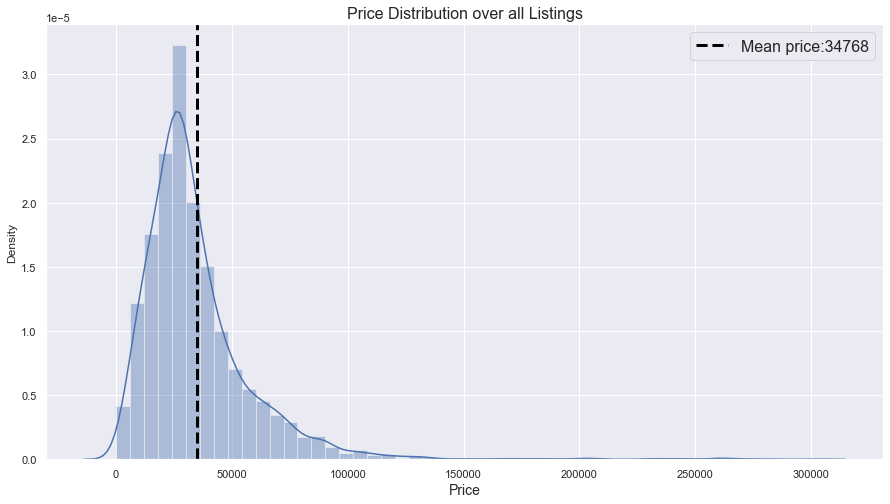

In [330]:
# price distribution over the listings
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(allcars_noskew['price($)'],kde=True) # to get the line set kde to True
plt.xlabel('Price',fontsize=14)
plt.axvline(allcars_noskew['price($)'].mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(allcars_noskew['price($)'])))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

C:\Users\richa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


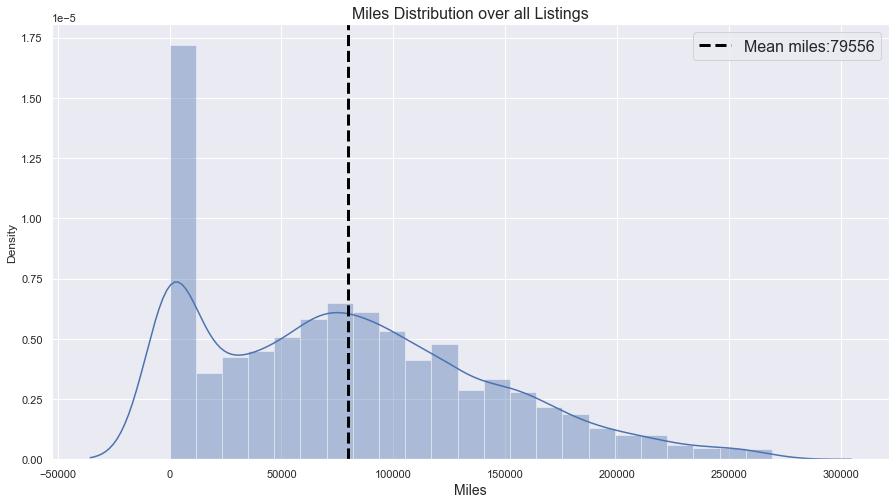

In [331]:
# distribution of mileage
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(allcars_noskew['mileage'],kde=True) # to get the line set kde to True
plt.xlabel('Miles',fontsize=14)
plt.axvline(allcars_noskew['mileage'].mean(),lw=3,ls='dashed',
            color='black',label='Mean miles:'+'{0:.0f}'.format(np.mean(allcars_noskew['mileage'])))
plt.title('Miles Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()



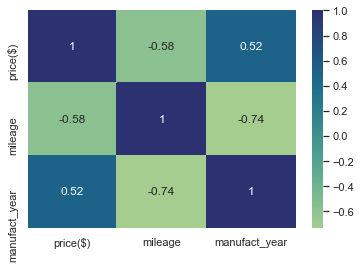

In [332]:
# Correlation of the numerical data
plt.figure(figsize=(6,4))
sns.heatmap(allcars_noskew[['price($)','mileage','manufact_year']].corr(),annot=True,cmap='crest');
#'coolwarm'

In [333]:
allcars_noskew['fuelType'].unique()

array(['Gasoline', 'Flex Fuel', 'Electric', 'Unknown', 'Hybrid', 'Diesel'],
      dtype=object)

In [ ]:
allcars_noskew.col

# Subplots

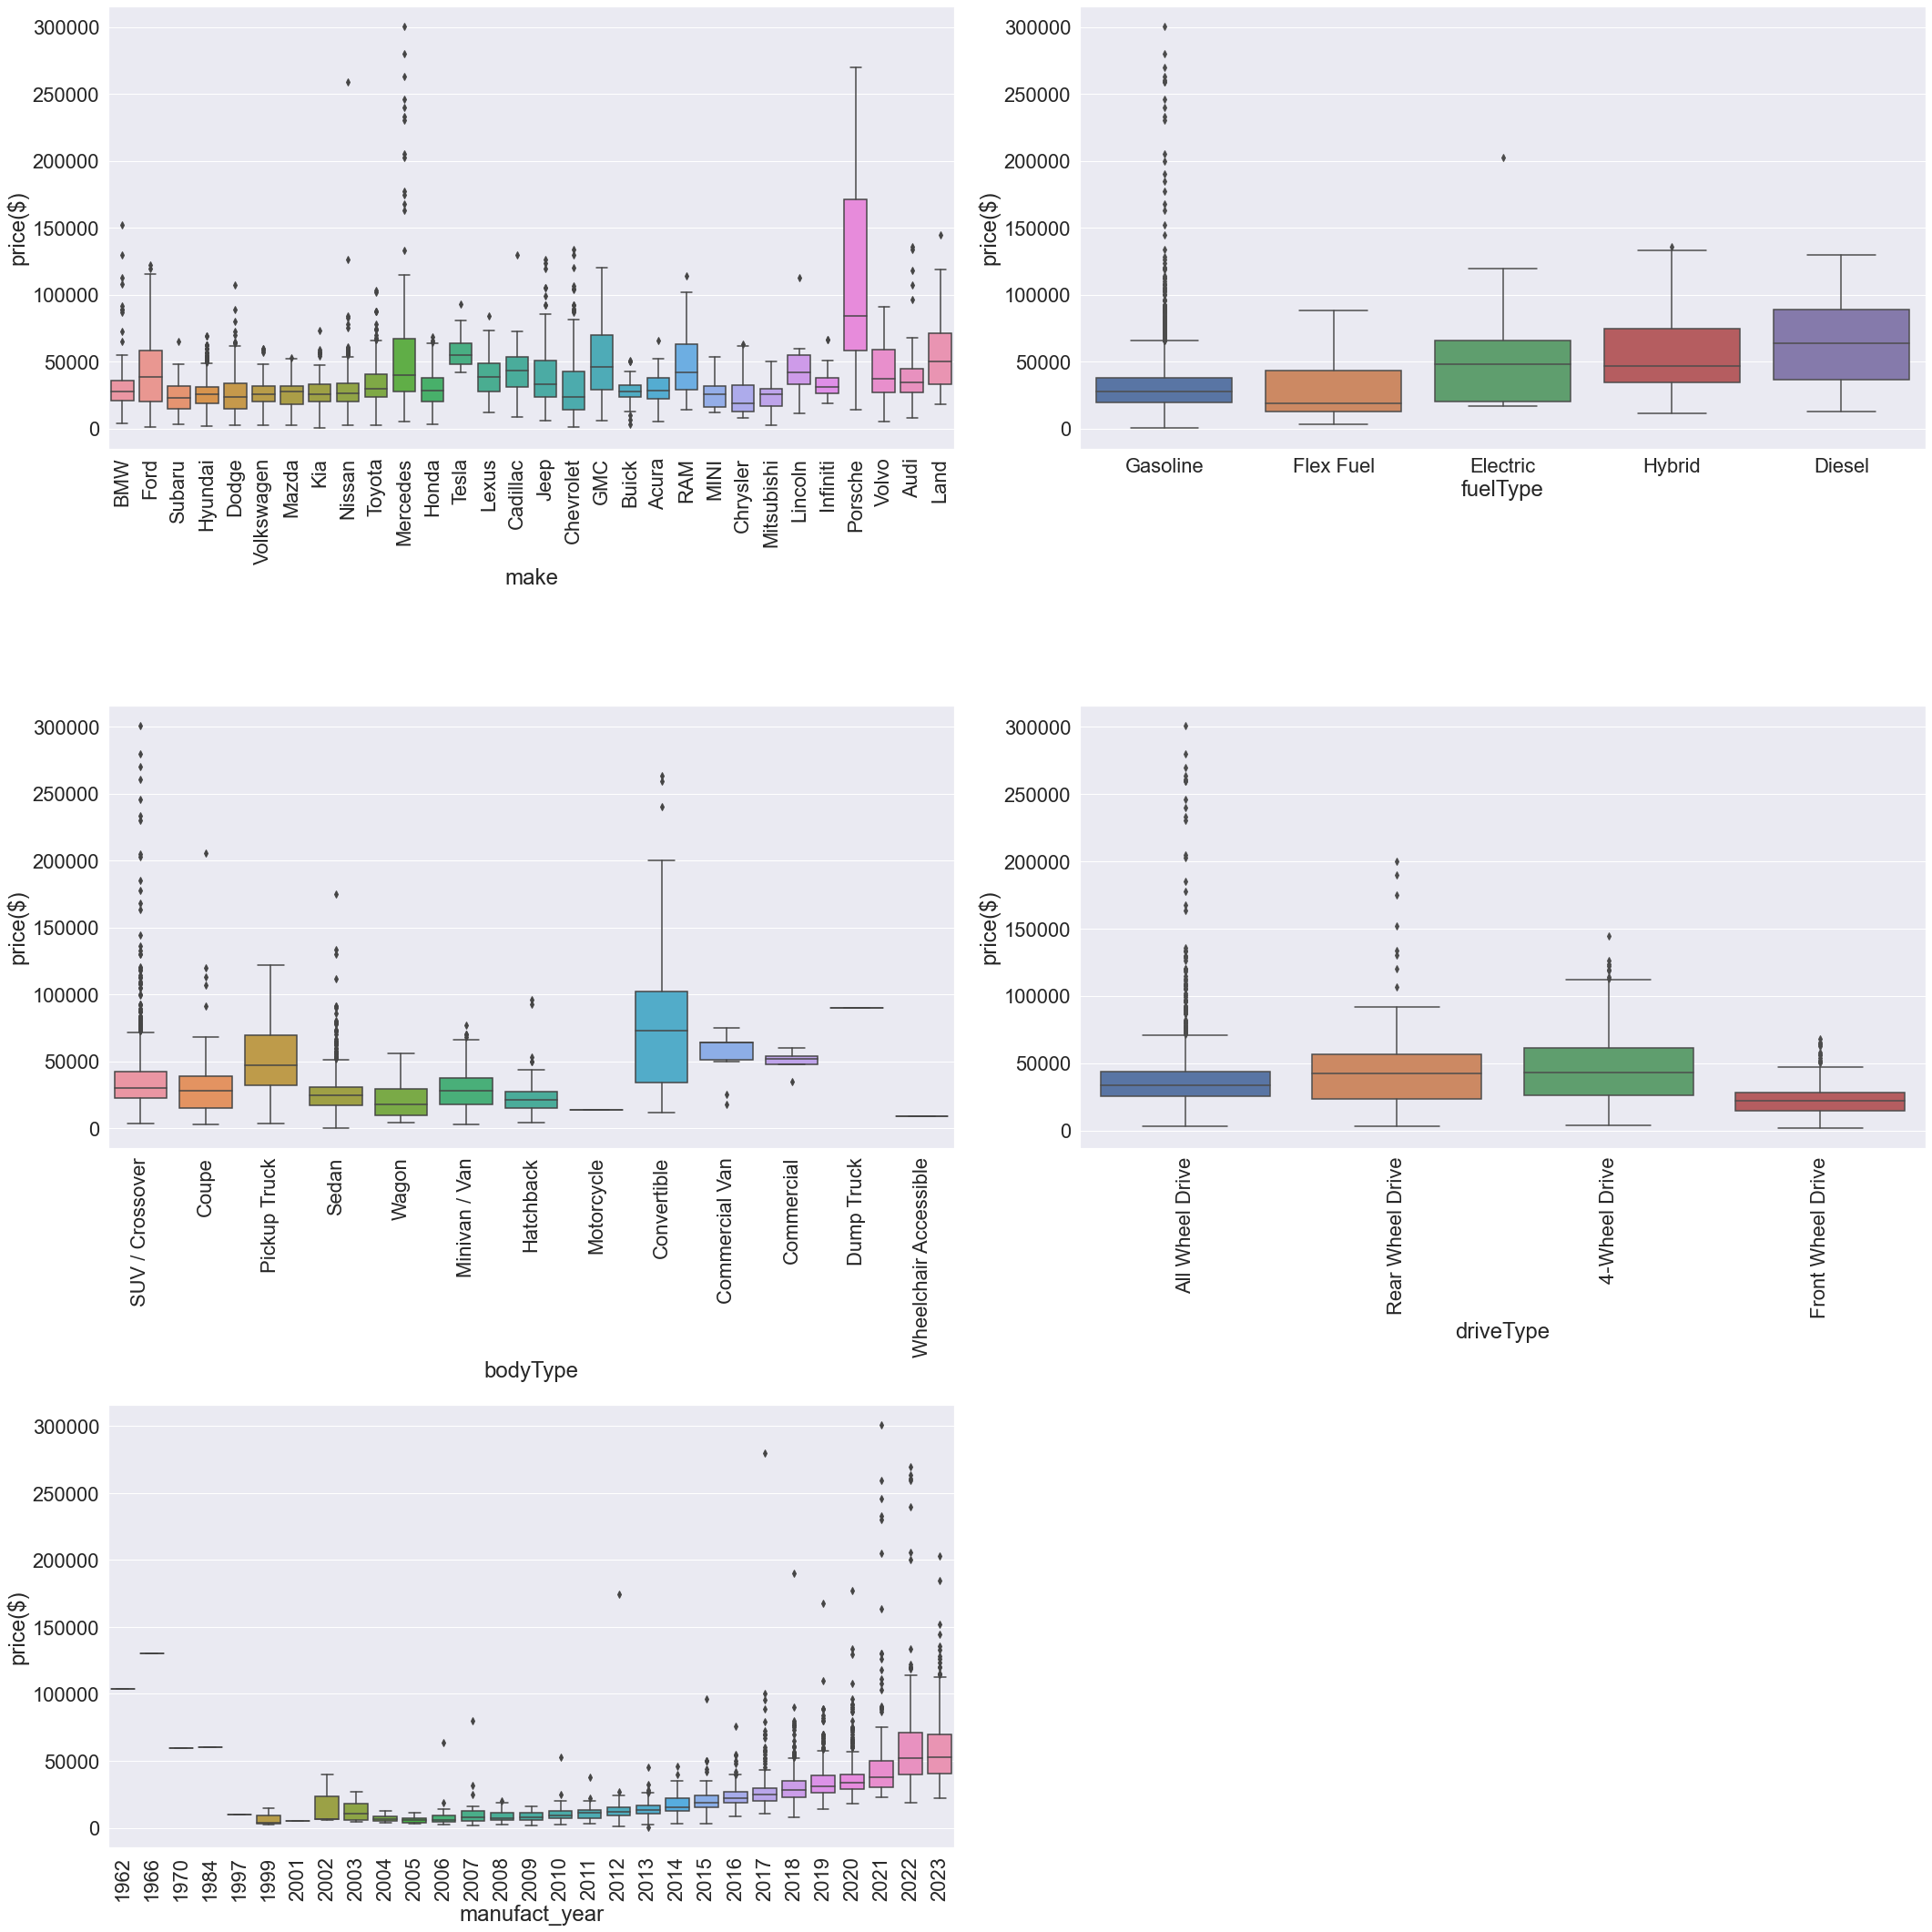

In [334]:
plt.figure(figsize=(30,30))
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.boxplot(x='make',y='price($)',data=allcars_noskew[allcars_noskew['make']!= 'N/A'])
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.boxplot(x='fuelType',y='price($)',data=allcars_noskew[allcars_noskew['fuelType']!='Unknown'])
plt.subplot(3,2,3)
plt.xticks(rotation=90)
sns.boxplot(x='bodyType',y='price($)',data=allcars_noskew[allcars_noskew['bodyType']!='Unknown'])
plt.subplot(3,2,4)
sns.boxplot(x='driveType',y='price($)',data=allcars_noskew[allcars_noskew['driveType']!='Unknown'])
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.boxplot(x='manufact_year',y='price($)',data=allcars_noskew);
plt.xticks(rotation=90);
plt.tight_layout()

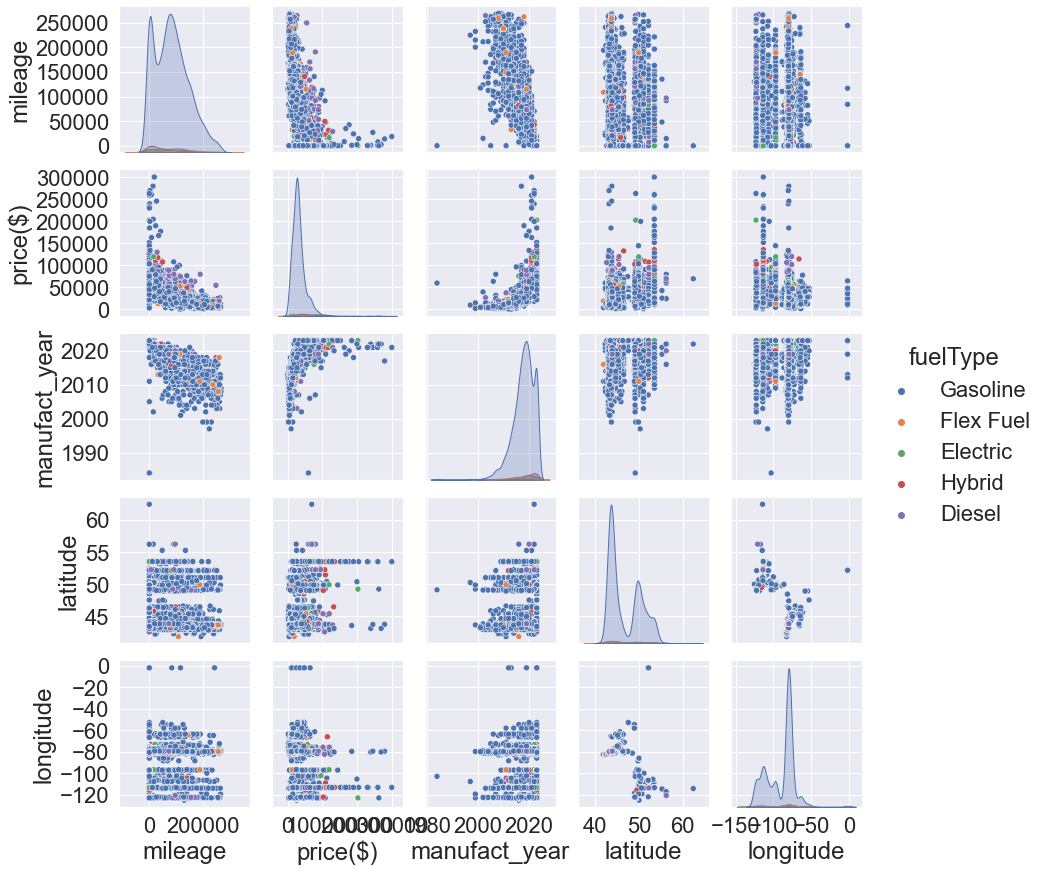

In [335]:
temp_df = allcars_noskew[allcars_noskew['fuelType']!='Unknown']
sns.pairplot(temp_df,hue = 'fuelType',height=2.5,diag_kind="kde");
sns.set(font_scale=0.8)

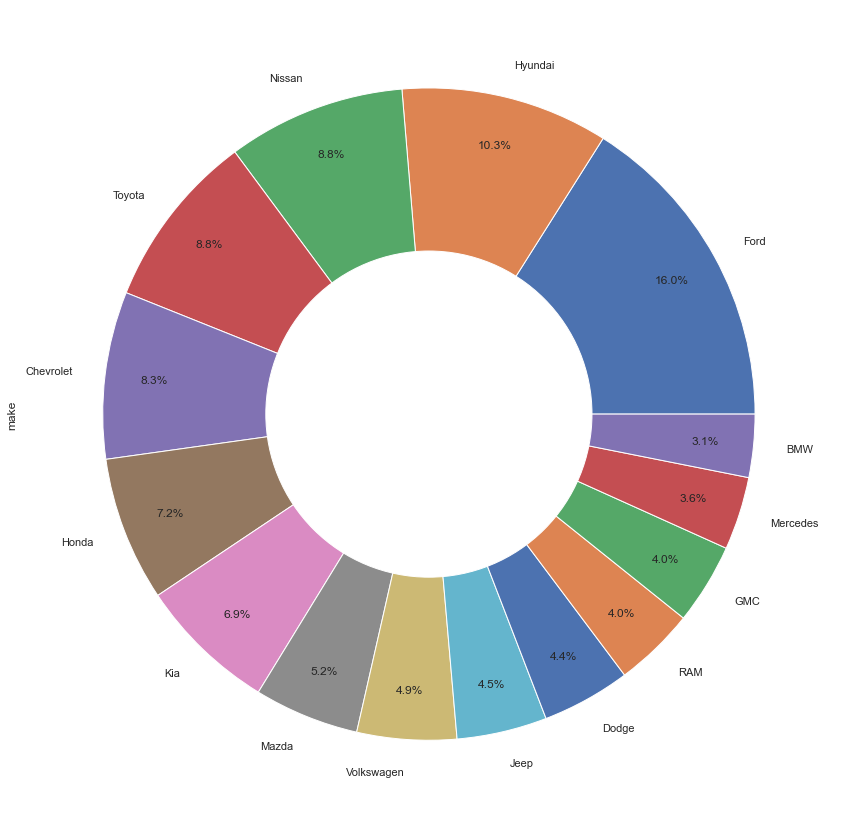

In [381]:
#Most Popular Car Maker in Used Car Market with donut graph
allcars_noskew['make'].value_counts().nlargest(15).plot.pie(autopct='%1.1f%%', pctdistance=0.85,
        )
centre_circle= plt.Circle((0,0),0.5, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
#plt.title('Top 15 autocar makers  ')
# Set aspect ratio to be equal
#ax.set_aspect('auto')
# Displaying Chart
plt.show()

## Top 10 highest priced vehicles

In [209]:
#sort the data frame by the highest priced vehicles
all_cars_sortprice=allcars_noskew.sort_values(by='price($)',ascending=False)


In [210]:
top10_priced_cars = all_cars_sortprice.head(10)
top10_priced_cars

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
2871,SUV / Crossover,Gasoline,All Wheel Drive,2021 Mercedes-Benz G-Class,18799.0,300680.0,Obsidian Black,2021,Mercedes,Benz G-Class,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631
250,SUV / Crossover,Gasoline,All Wheel Drive,2017 Mercedes-Benz G-Class,13900.0,279910.0,Black,2017,Mercedes,Benz G-Class,Toronto Auto Brokers,Vaughan,ON,43.794154,-79.526802
2502,SUV / Crossover,Gasoline,All Wheel Drive,2022 Porsche Cayenne,2553.0,269888.0,Dark Grey,2022,Porsche,Cayenne,Car Nation Canada,Brantford,ON,43.140816,-80.263173
4277,Convertible,Gasoline,All Wheel Drive,2022 Mercedes-Benz SL-Class,90.0,263290.5,Obsidian Black Metallic w/ black soft top,2022,Mercedes,Benz SL-Class,Mercedes-Benz Vancouver,Vancouver,BC,49.260872,-123.113952
2879,SUV / Crossover,Gasoline,All Wheel Drive,2022 Porsche Cayenne,7933.0,260680.0,Arctic Grey,2022,Porsche,Cayenne,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631
1595,Convertible,Gasoline,All Wheel Drive,2022 Porsche 911,2300.0,259238.0,Chalk,2022,Porsche,911,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631
2854,Unknown,Gasoline,All Wheel Drive,2021 Nissan GT-R,900.0,259238.0,Pearl White Tricoat,2021,Nissan,GT-R,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631
2838,SUV / Crossover,Gasoline,All Wheel Drive,2021 Mercedes-Benz G-Class,27185.0,245980.0,Black,2021,Mercedes,Benz G-Class,AA Canada Inc,North York,ON,43.754326,-79.449117
1868,Convertible,Gasoline,All Wheel Drive,2022 Mercedes-Benz SL-Class,1168.0,239888.0,White,2022,Mercedes,Benz SL-Class,Car Nation Canada,Brantford,ON,43.140816,-80.263173
2887,SUV / Crossover,Gasoline,All Wheel Drive,2021 Mercedes-Benz G-Class,280.0,233225.0,Obsidian Black,2021,Mercedes,Benz G-Class,Sherwood Motorcars,Sherwood Park,AB,53.525696,-113.296631


# Most Popular Car Maker in Used Car Market

In [ ]:
dist2 = data[data['property_tax'] < 50000]
ax3 = sns.jointplot(x='listed_price',y= 'property_tax',data=dist2,kind="reg", marker = 'x')
ax3.set_axis_labels('Listing Price', 'Property Tax')
#h.set_axis_labels('x', 'y', fontsize=16)
plt.grid() 
plt.show()

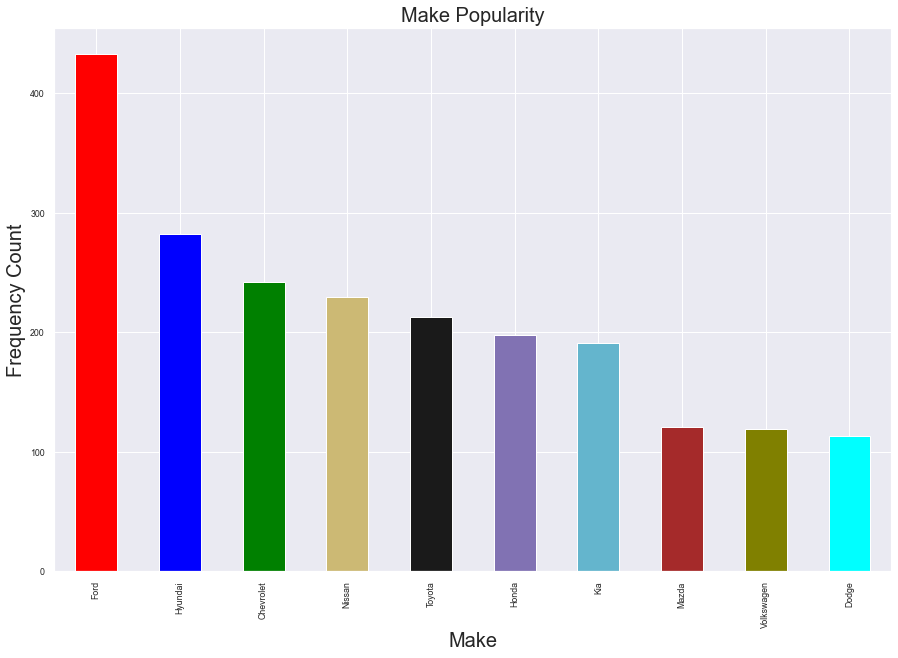

In [290]:
plt.figure(figsize = (15, 10))
allcars_noskew['make'].value_counts().nlargest(10).plot(kind='bar',title='Make Popularity',
                                                  color=['red','blue','green','y','k','m','c','brown',
                                                         'olive','cyan','indigo','magenta','olivedrab','coral','gold',
                                                         'darkgreen','navy','purple','lime'])
plt.title('Make Popularity',fontsize=20)
plt.xlabel('Make',fontsize=20);
plt.ylabel('Frequency Count',fontsize=20);



# Popular Colour in Used Car Market

In [291]:
import difflib

In [292]:
# To normalize the color
color_dict = {
    'black': '#000000',
    'white': '#FFFFFF',
    'red': '#FF0000',
    'green': '#008000',
    'blue': '#0000FF',
    'yellow': '#FFFF00',
    'orange': '#FFA500',
    'purple': '#800080'
    
}

# Normalize colors using the color_dict
allcars_noskew['color'] = allcars_noskew['color'].apply(lambda x: max(color_dict, key=lambda k: difflib.SequenceMatcher(None, k, x).ratio()))

In [ ]:
dist2 = data[data['color'].value < 50000]
ax3 = sns.jointplot(x='listed_price',y= 'property_tax',data=dist2,kind="reg", marker = 'x')
ax3.set_axis_labels('Listing Price', 'Property Tax')
#h.set_axis_labels('x', 'y', fontsize=16)
plt.grid() 
plt.show()

<Figure size 1080x1080 with 0 Axes>

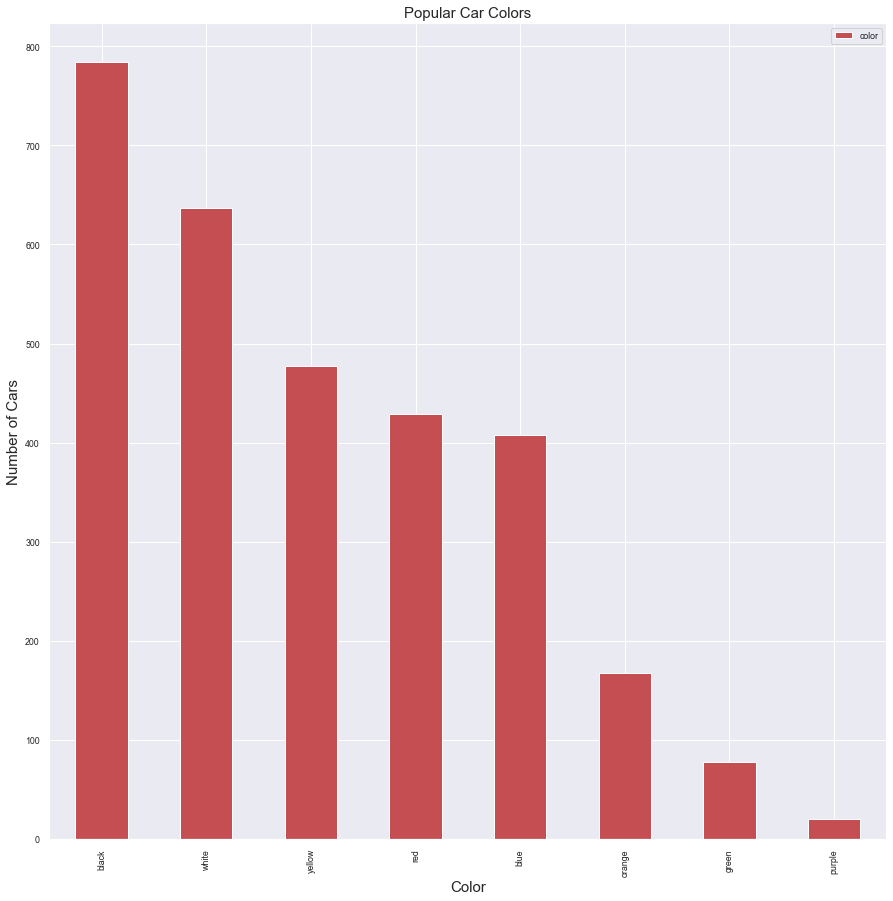

In [303]:
allcars_noskew_filteredcolor= allcars_noskew[allcars_noskew['color']!='Unknown']
top10_colors = pd.DataFrame(allcars_noskew_filteredcolor['color'].value_counts(ascending = False).head(10))

plt.figure(figsize=(15, 15))
top10_colors.plot(kind='bar',color=['r', 'b', 'g', 'y', 'k', 'm', 'c', 'brown'])
plt.title('Popular Car Colors', fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Number of Cars', fontsize=15)
plt.show();


In [ ]:
import plotly.express as px
#df = px.allcars_noskew()
fig = px.scatter_3d(allcars_noskew, x='color', y='make', z='price($)',
                    color='color', symbol='price($)')
fig.show()

# Average Price of Each Car Maker

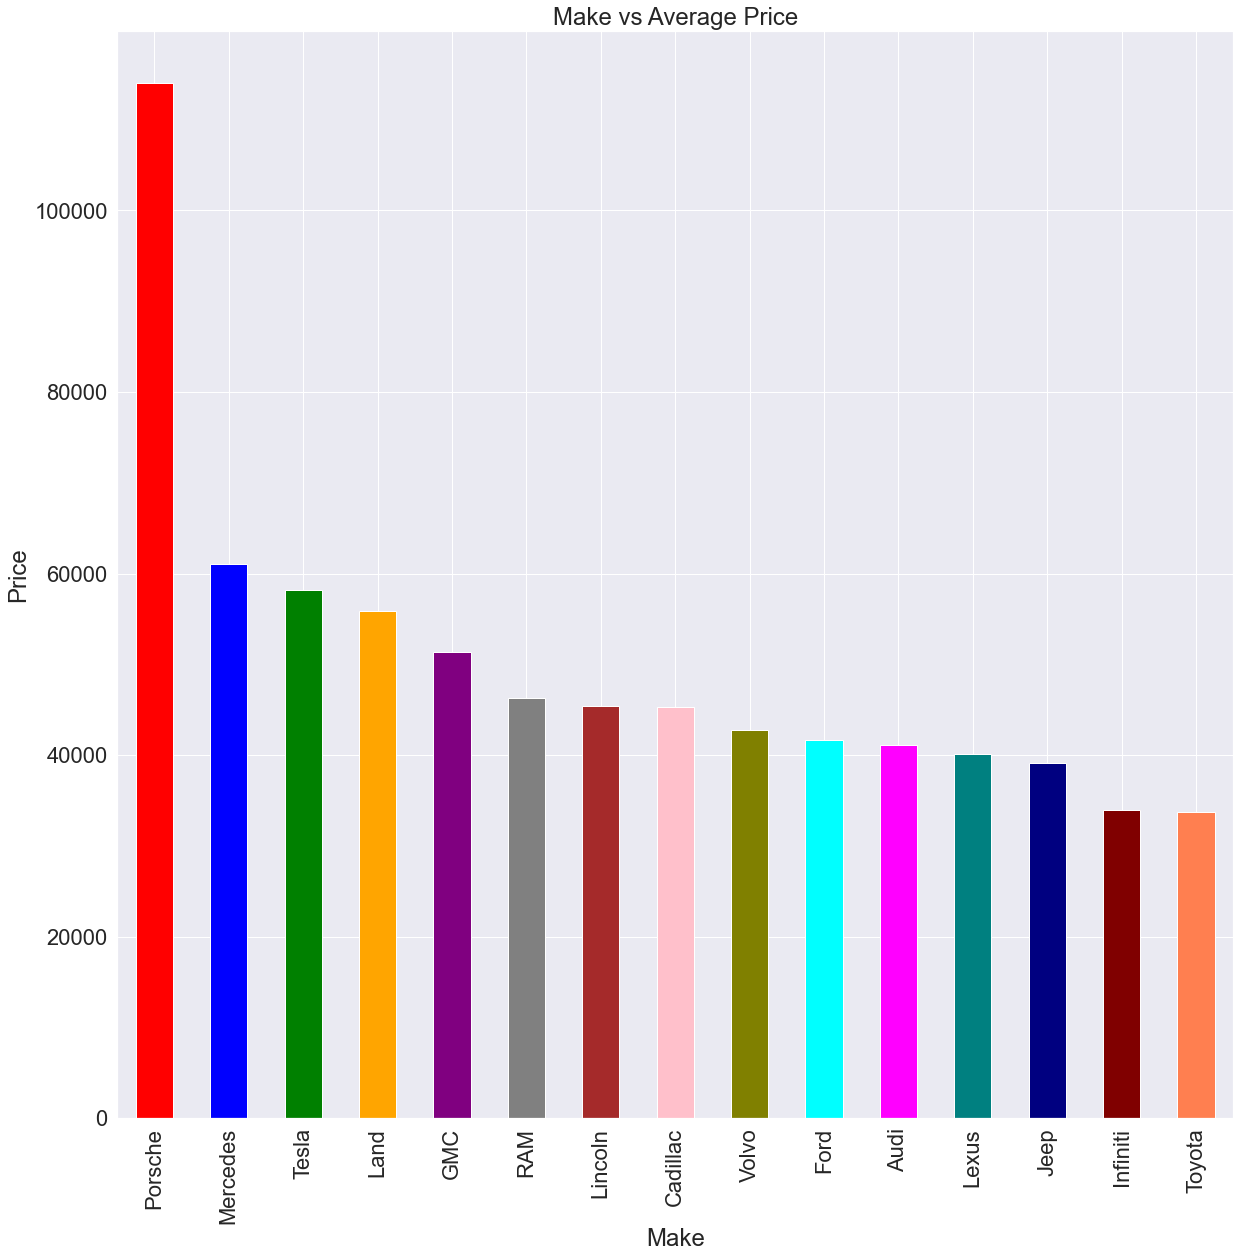

In [221]:
top_15=allcars_noskew.groupby(['make'])['price($)'].mean().sort_values(ascending=False).nlargest(15)
plt.figure(figsize=(20, 20))
ax=top_15.plot(kind='bar',color=['red', 'blue', 'green', 'orange', 'purple', 'gray', 'brown', 'pink', 
                                 'olive', 'cyan', 'magenta', 'teal', 'navy','maroon', 'coral'])
plt.title('Make vs Average Price')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()


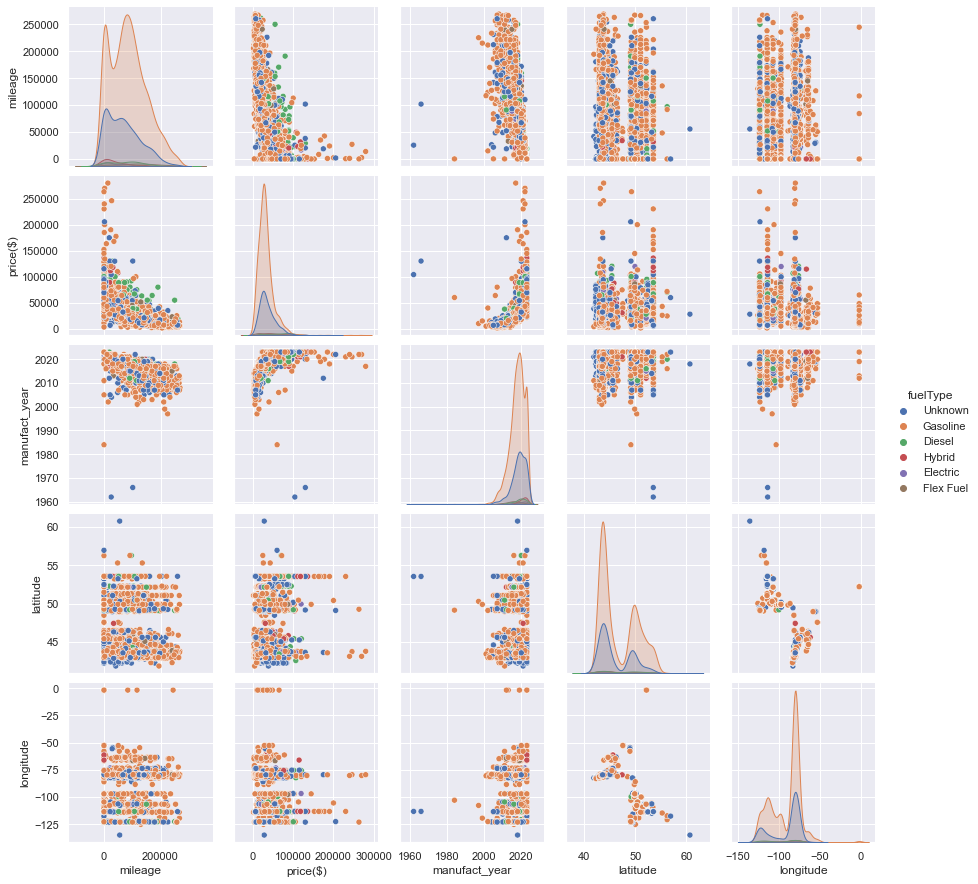

In [376]:
sns.pairplot(allcars_noskew,hue = 'fuelType')

In [367]:
allcars_noskew.columns


Index(['bodyType', 'fuelType', 'driveType', 'name', 'mileage', 'price($)',
       'color', 'manufact_year', 'make', 'model', 'car_dealer', 'city',
       'province', 'latitude', 'longitude'],
      dtype='object')

# Price Analysis Between Electric and Hybrid Cars in a Calendar Year

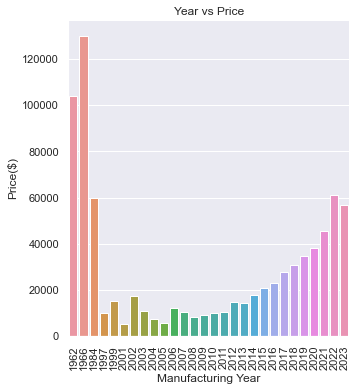

In [369]:
sns.catplot(x='manufact_year',y='price($)',data=allcars_noskew,kind='bar',ci=False)
plt.xlabel('Manufacturing Year')
plt.ylabel('Price($)')
plt.title('Year vs Price')
plt.xticks(rotation=90);

# Influence of mileage on the price

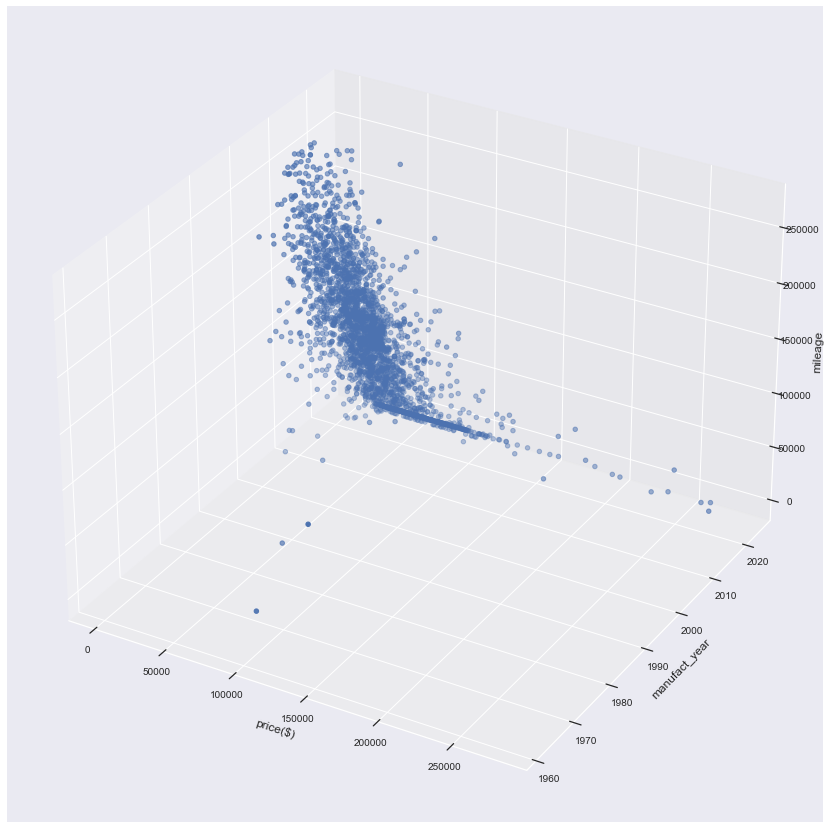

In [371]:
# 3d plot to show the correlation between mileage, price, manufact_year
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
allcars_noskew= allcars_noskew.sample(3000)
ax.scatter(allcars_noskew['price($)'],allcars_noskew['manufact_year'], allcars_noskew['mileage'])
# set axis labels
ax.set_xlabel('price($)')
ax.set_ylabel('manufact_year')
ax.set_zlabel('mileage')
ax.tick_params(axis='both', labelsize=10)
# Separate the labels from the axis
ax.xaxis._axinfo['label']['space_factor'] = 4.0
# show the plot
plt.show()

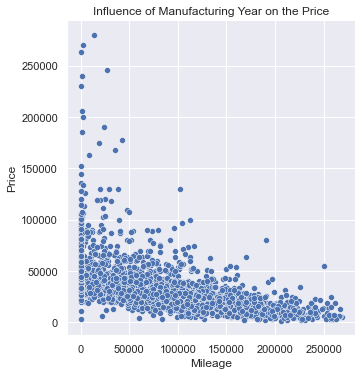

In [394]:
sns.set(rc={'figure.figsize':(15,15)})
sns.relplot(x='mileage',y='price($)',data=allcars_noskew,kind='scatter',ci=False)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Influence of Manufacturing Year on the Price');

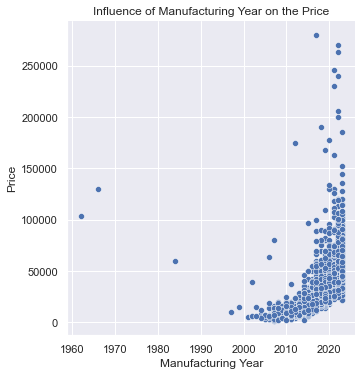

In [384]:
sns.set(rc={'figure.figsize':(15,15)})
sns.relplot(x='manufact_year',y='price($)',data=allcars_noskew,kind='scatter',ci=False)
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.title('Influence of Manufacturing Year on the Price');

<AxesSubplot:xlabel='manufact_year', ylabel='price($)'>

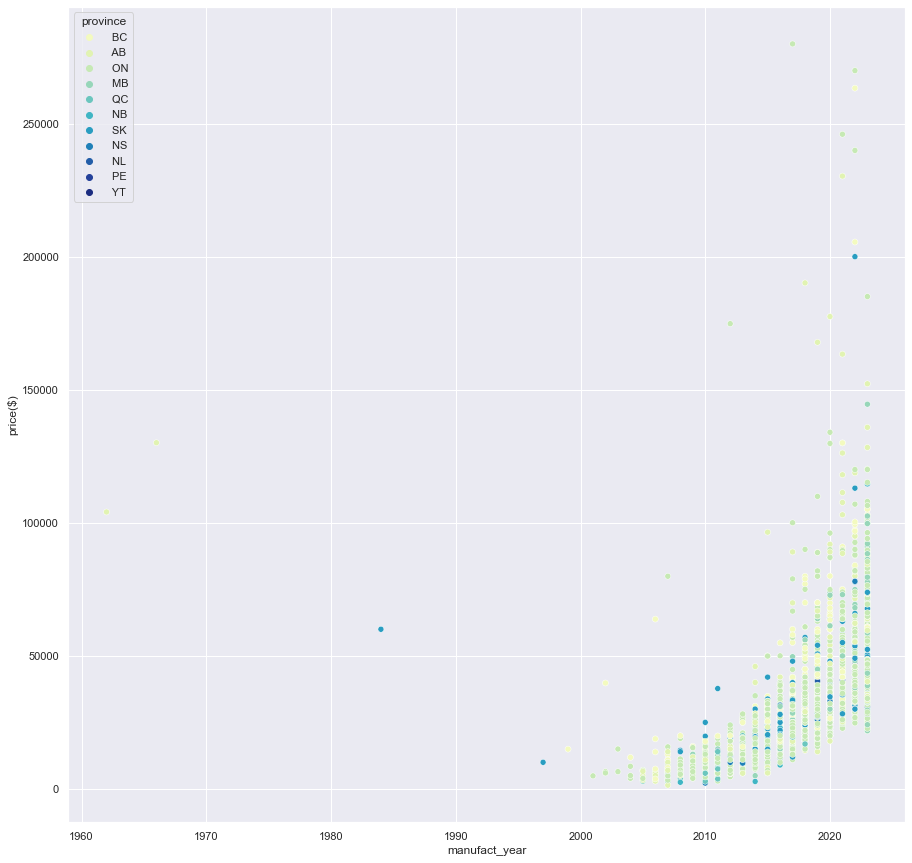

In [374]:
#Scatter plot for pricing over the manfacturing year and province
sns.scatterplot(x='manufact_year', y='price($)',data =allcars_noskew, hue = 'province', palette = 'YlGnBu')

In [418]:
# Distribution of the listings over different cities
df = allcars_noskew.groupby(['latitude','longitude']).agg(No_of_listings= ('name','count'))
df = df.reset_index()
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoiY2FycGFnZXMiLCJhIjoiY2xlZXNjZjR2MDRhaTNzcG1nNmNtYzM4aiJ9.mPoR_R6ZBQ3DG6PI8ljqSA')
fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        size='No_of_listings',
                        zoom=10, height=500)
                        
fig.show()

In [431]:
allcars_noskew.columns

Index(['bodyType', 'fuelType', 'driveType', 'name', 'mileage', 'price($)',
       'color', 'manufact_year', 'make', 'model', 'car_dealer', 'city',
       'province', 'latitude', 'longitude'],
      dtype='object')

In [448]:
df = allcars_noskew.groupby('bodyType').agg(count = ('name','count'))
df = df.reset_index()
s = df['count'].sum()
percentage = df['count']/s
print(percentage)
df

0     0.000454
1     0.001134
2     0.002494
3     0.008390
4     0.018594
5     0.000227
6     0.046939
7     0.040136
8     0.000227
9     0.000227
10    0.139002
11    0.349660
12    0.270748
13    0.000907
14    0.001361
15    0.109751
16    0.009524
17    0.000227
Name: count, dtype: float64


,bodyType,count
0,Class A Motorhome,2
1,Commercial,5
2,Commercial Van,11
3,Convertible,37
4,Coupe,82
5,Dump Truck,1
6,Hatchback,207
7,Minivan / Van,177
8,Motorcycle,1
9,Off-road,1


In [445]:
df = allcars_noskew.groupby('fuelType').agg(count = ('name','count'), percentage = ())
df = df.reset_index()
s = df['count'].sum()
percentage = df['count']/s
print(percentage)
df

0    0.021542
1    0.011338
2    0.014512
3    0.694558
4    0.020181
5    0.237868
Name: count, dtype: float64


,fuelType,count
0,Diesel,95
1,Electric,50
2,Flex Fuel,64
3,Gasoline,3063
4,Hybrid,89
5,Unknown,1049


In [451]:
df = allcars_noskew.groupby('manufact_year').agg(count = ('name','count'))
df = df.reset_index()
s = df['count'].sum()
print(s)
percentage = df['count']/s
print(percentage)
df

4410
0     0.000227
1     0.000227
2     0.000227
3     0.000227
4     0.000227
5     0.000680
6     0.000454
7     0.000680
8     0.000907
9     0.002721
10    0.002948
11    0.004082
12    0.008390
13    0.008617
14    0.008163
15    0.017914
16    0.017687
17    0.021315
18    0.034240
19    0.041497
20    0.057823
21    0.072109
22    0.088209
23    0.104989
24    0.111565
25    0.102268
26    0.077324
27    0.058503
28    0.155782
Name: count, dtype: float64


,manufact_year,count
0,1962,1
1,1966,1
2,1970,1
3,1984,1
4,1997,1
5,1999,3
6,2001,2
7,2002,3
8,2003,4
9,2004,12


In [435]:
allcars_noskew[allcars_noskew['mileage']==1]

,bodyType,fuelType,driveType,name,mileage,price($),color,manufact_year,make,model,car_dealer,city,province,latitude,longitude
284,Travel Trailer,Unknown,Unknown,2014 Keystone RV Cougar,1.0,29800.0,White,2014,Keystone,RV Cougar,Winnipeg West Automotive Group,Headingley,MB,49.868087,-97.391052
285,Travel Trailer,Unknown,Unknown,2015 Keystone RV Springdale,1.0,24800.0,GREY METALLIC WITH SPECIAL GRAPHICS,2015,Keystone,RV Springdale,Winnipeg West Automotive Group,Headingley,MB,49.868087,-97.391052
303,Unknown,Gasoline,4-Wheel Drive,2023 Jeep Grand Cherokee,1.0,92623.0,Silver Zynith,2023,Jeep,Grand Cherokee,Listowel Chrysler,Listowel,ON,43.731593,-80.952882
715,SUV / Crossover,Gasoline,4-Wheel Drive,2023 Ford Bronco Sport,1.0,44899.0,Hot Pepper Red Tinted Clearcoat,2023,Ford,Bronco Sport,Capital Ford Regina,Regina,SK,50.448760,-104.617310
820,Travel Trailer,Unknown,Unknown,2015 Palomino Columbus,1.0,44800.0,TAN METALLIC WITH SPECIAL GRAPHICS,2015,Palomino,Columbus,Winnipeg West Automotive Group,Headingley,MB,49.868087,-97.391052
1201,Pickup Truck,Gasoline,4-Wheel Drive,2023 Ford F-150,1.0,66655.0,Oxford White,2023,Ford,F-150,Capital Ford Regina,Regina,SK,50.448760,-104.617310
1202,Pickup Truck,Gasoline,4-Wheel Drive,2023 Ford Ranger,1.0,57355.0,Carbonized Grey Metallic,2023,Ford,Ranger,Capital Ford Regina,Regina,SK,50.448760,-104.617310
1203,SUV / Crossover,Gasoline,4-Wheel Drive,2023 Ford Explorer,1.0,60380.0,Rapid Red Metallic Tinted Clearcoat,2023,Ford,Explorer,Capital Ford Regina,Regina,SK,50.448760,-104.617310
1442,Unknown,Hybrid,4-Wheel Drive,2023 Jeep Wrangler,1.0,69698.0,Bright White Clear Coat,2023,Jeep,Wrangler,Listowel Chrysler,Listowel,ON,43.731593,-80.952882
1443,Unknown,Hybrid,4-Wheel Drive,2023 Jeep Wrangler,1.0,69698.0,Sarge Green Clear Coat,2023,Jeep,Wrangler,Listowel Chrysler,Listowel,ON,43.731593,-80.952882


In [ ]:
Conclusion:
1) There is moderate corelation between mileage and price, manufacturing year and  price.
2) In the listings, 34% cars are the SUV's.
3) Maximum car are Gasoline based, which is 69% of the total listings.
4) All Wheel Drive leads with 32% 

